In [65]:
import warnings
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
warnings.filterwarnings("ignore")

In [66]:
def non_equal_numbers(individ, exact):
    """
    Выдает список с местами разных цифр.
    """
    max_dim = max(exact.shape)
    list_of_points = []
    for i in range(max_dim):
        for j in range(max_dim):
            list_of_points.append((i,j))
    for point in list_of_points:
       if A[point] == individ[point]:
            list_of_points.remove(point)
    return list_of_points

def intersection(points_a, points_b, coeff):
    intersection = list((Counter(points_a) & Counter(points_b)).elements())
    coeff = int(coeff * len(intersection))

    intersection_point_list= np.arange(len(intersection))
    np.random.shuffle(intersection_point_list)
    intersection_point_list = intersection_point_list[:coeff]

    intersection_reduced = []
    for point in intersection_point_list:
        intersection_reduced.append(intersection[point])
    return intersection_reduced

def crossover(population, coeff):
    for i in range(len(pop)):
        a, b = np.random.randint(0, len(pop), 2)
        if a == b:
            a = (a + 1) // len(pop)
        points_a, points_b = non_equal_numbers(pop[a], A), non_equal_numbers(pop[b], A)
        intersect = intersection(points_a, points_b, coeff)
        for point in intersect:
            pop[a][point] = pop[b][point]
    return population

def mutation(individ, A, coef):
    minimum, maximum, shape = A.min(), A.max(), A.shape
    pnts = non_equal_numbers(individ, A)

    pick = int(coef * len(pnts))
    if pick == 0:
        pick += 1

    for i in range(pick):
        tick = np.random.randint(0, len(pnts))
        individ[pnts[tick]] = np.random.randint(minimum, maximum)
        pnts.remove(pnts[tick])
    return individ

def init_pop(count, A):
    minimum, maximum, shape = A.min(), A.max(), A.shape
    pop = []
    for i in range(count):
        pop.append(np.random.randint(minimum, maximum, shape))
    return pop

def fitness(individ, A_exact):
    fitness = []
    for index, matrix in enumerate(individ):
        fitness.append([np.linalg.norm(matrix - A_exact), index])
    return fitness

def best_ind(pop, fit, mark):
    fit = np.stack(fit)
    best_indvid = []
    for i, num in enumerate(fit[:,0]):
        if num < mark:
            best_indvid.append(pop[i])
            return best_indvid
    return best_indvid

def selection(pop, fit):
    population_worse = []
    population_best = []
    sorted_fit = np.array(sorted(np.stack(fit), key = lambda x: x[0]))
    partial_pop_fit_worse = np.array(list(filter(lambda elem: elem[0] > np.mean(sorted_fit[:,0]), sorted_fit)))
    partial_pop_fit_best = np.array(list(filter(lambda elem: elem[0] < np.mean(sorted_fit[:,0]), sorted_fit)))
    for f in partial_pop_fit_worse[:,1]:
        population_worse.append(pop[int(f)])
    for f in partial_pop_fit_best[:,1]:
        population_best.append(pop[int(f)])
    return population_worse, population_best

def optimizer(pop, solution, stop, coeff):
    best = []
    generation = 0
    while not best:
        population = []
        fit = fitness(pop, solution)
        best = best_ind(pop, fit, stop)
        part_pop_worse, part_pop_best = selection(pop,fit)
        part_pop = crossover(part_pop_worse,coeff)
        # part_pop = part_pop_worse
        for ind in part_pop:
            population.append(mutation(ind, solution, coeff))
        pop = part_pop_best + population
        generation += 1
    return best, generation

In [72]:
result = []
res = {'shape':[],'n_iter': [],'n_gens':[],'time':[], 'fitness': []}
sh = [(3,3), (4,4)]
mat = []
for s in sh:
    A = np.random.randint(0,20,s)
    for i in range(10):
        pop = init_pop(200, A)
        fit_init = fitness(pop,A)
        stop = 0.1*np.mean(np.stack(fit_init)[:,0])
        print(stop)
        start = time.time()
        best, n_gens = optimizer(pop, A, stop, 0.5)
        print(best)
        end = time.time()
        res['shape'].append(s)
        res['n_iter'].append(i)
        res['n_gens'].append(n_gens)
        res['time'].append(end - start)
        res['fitness'].append(np.linalg.norm(best[0] - A))
    result.append(res)
    mat.append(A)

1.8353472402908524
[array([[10,  2,  8],
       [ 1,  0, 14],
       [ 5,  5,  5]])]
1.8555944927588748
[array([[10,  8,  8],
       [ 1,  0, 14],
       [ 5,  5,  5]])]
1.7937165462754068
[array([[10,  8,  8],
       [ 1,  1, 14],
       [ 5,  4,  5]])]
1.8213251042520184
[array([[10,  8,  6],
       [ 1,  4,  5],
       [ 5,  4,  5]])]
1.8469094093274305
[array([[10,  8,  8],
       [ 1,  0, 14],
       [ 5,  3,  5]])]
1.82012976644508
[array([[11,  8,  8],
       [ 1,  0, 14],
       [ 5,  3,  5]])]
1.8408039752543415
[array([[10, 14,  8],
       [ 1,  0,  0],
       [ 5, 14,  5]])]
1.7947392969639893
[array([[10, 13,  8],
       [ 3,  0, 11],
       [ 5,  6,  5]])]
1.8155215115542795
[array([[10,  7,  8],
       [ 1,  0,  9],
       [ 5, 10,  5]])]
1.8250466603590203
[array([[10,  9,  9],
       [ 1,  5, 14],
       [ 5,  4,  5]])]
3.074194039242471
[array([[11,  6, 12,  1],
       [ 7,  9,  1, 16],
       [18, 13,  4, 16],
       [11, 12, 10, 11]])]
3.0216360443193313
[array([[11,

In [73]:
data = pd.DataFrame(res)

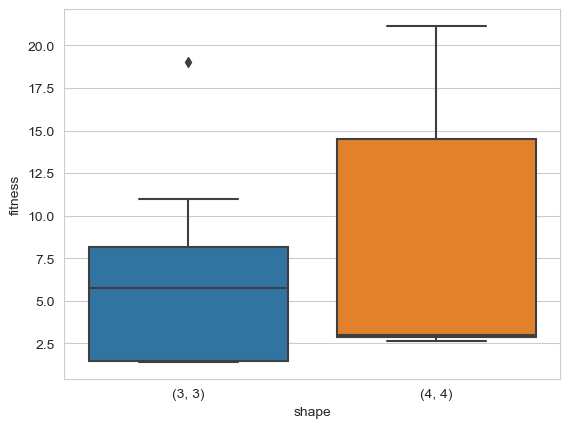

In [82]:
sns.boxplot(data = data, x ='shape', y = 'fitness')
plt.savefig('fit.png', dpi = 150)

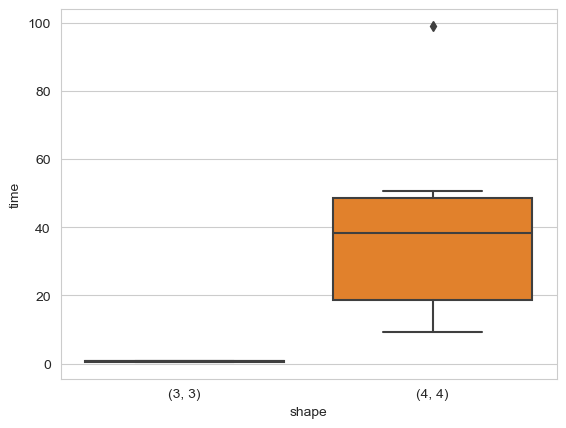

In [83]:
sns.boxplot(data = data, x ='shape', y = 'time')
plt.savefig('time.png', dpi = 150)

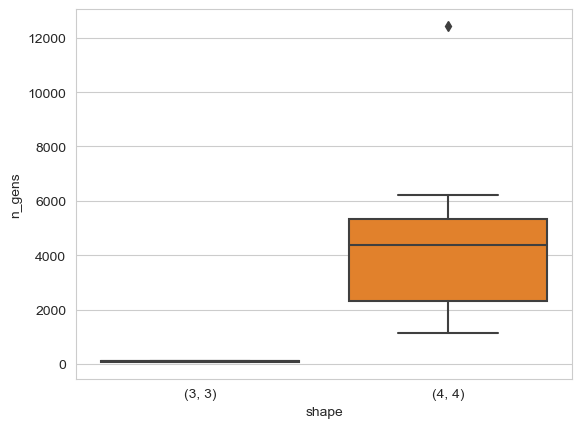

In [85]:
sns.boxplot(data = data, x ='shape', y = 'n_gens')
plt.savefig('n_gens.png', dpi = 150)